In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
train=pd.read_csv(r"C:\\Users\\mughe\\Desktop\\Dataset\\Disease Prediction\\Training.csv")
test=pd.read_csv(r"C:\\Users\\mughe\\Desktop\\Dataset\\Disease Prediction\\Testing.csv")

In [12]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [13]:
train.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [15]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [16]:
train.shape

(4920, 134)

In [17]:
train=train.drop(["Unnamed: 133"],axis=1)

In [18]:
train.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [19]:
col=train.columns
col

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

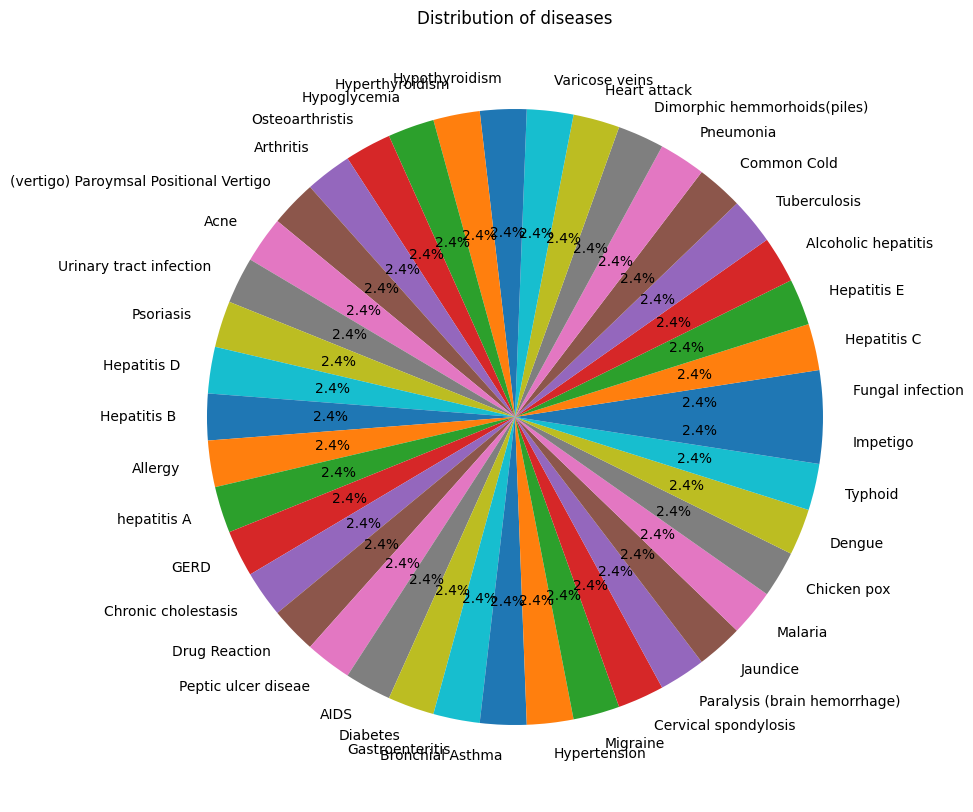

In [20]:
diseases = ["Fungal infection", "Hepatitis C", "Hepatitis E", "Alcoholic hepatitis", "Tuberculosis", "Common Cold", "Pneumonia", "Dimorphic hemmorhoids(piles)", "Heart attack", "Varicose veins", "Hypothyroidism", "Hyperthyroidism", "Hypoglycemia", "Osteoarthristis", "Arthritis", "(vertigo) Paroymsal Positional Vertigo", "Acne", "Urinary tract infection", "Psoriasis", "Hepatitis D", "Hepatitis B", "Allergy", "hepatitis A", "GERD", "Chronic cholestasis", "Drug Reaction", "Peptic ulcer diseae", "AIDS", "Diabetes", "Gastroenteritis", "Bronchial Asthma", "Hypertension", "Migraine", "Cervical spondylosis", "Paralysis (brain hemorrhage)", "Jaundice", "Malaria", "Chicken pox", "Dengue", "Typhoid", "Impetigo"]

cases = [120] * len(diseases)

plt.figure(figsize=(10, 10))
plt.pie(cases, labels=diseases, autopct='%1.1f%%')
plt.title("Distribution of diseases")
plt.show()

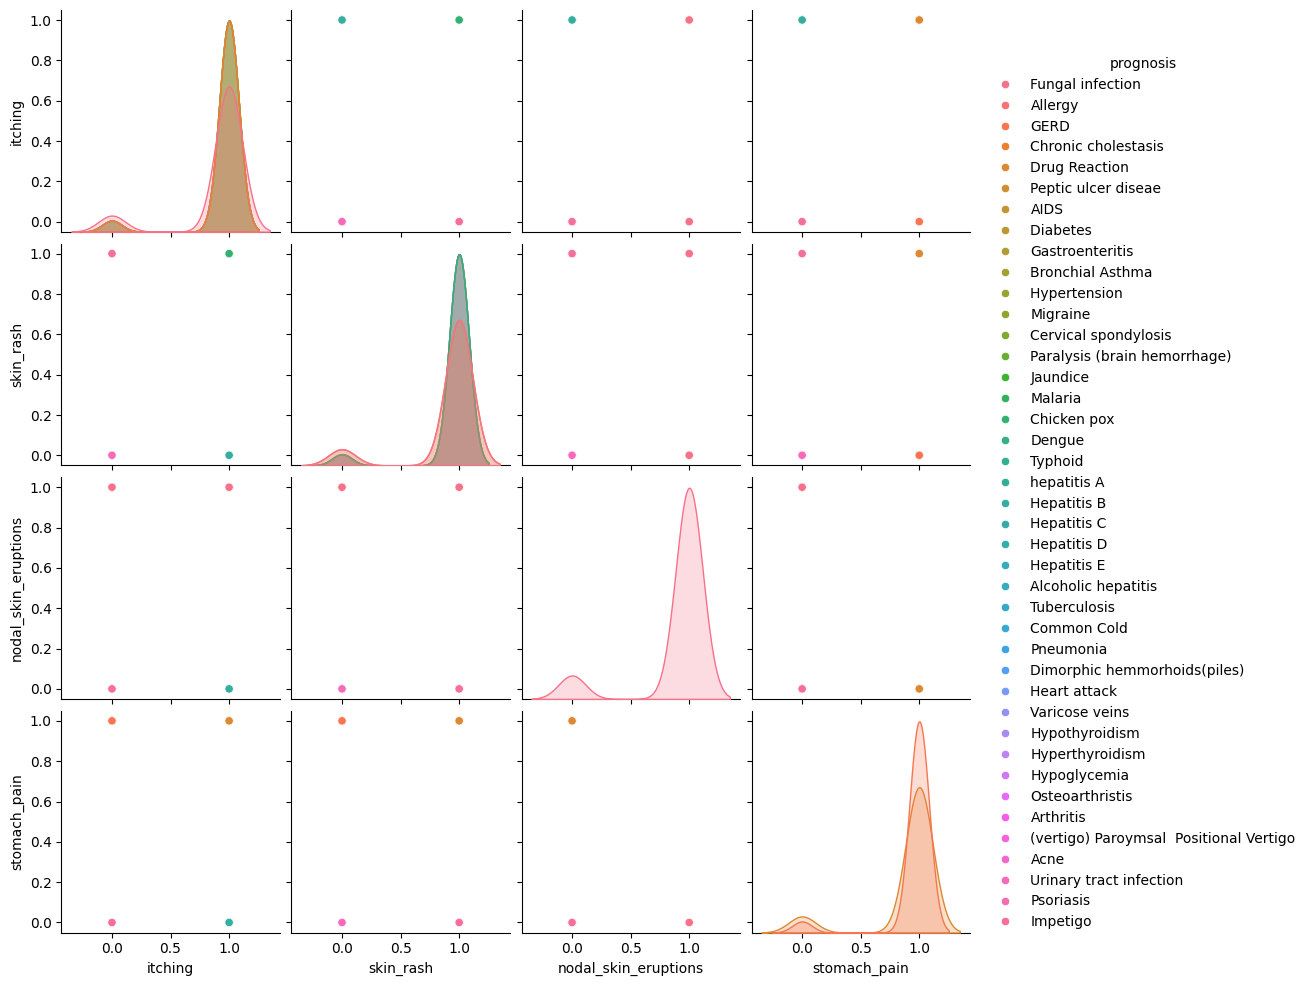

In [21]:
selected_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain', 'prognosis']

train_selected = train[selected_columns]

sns.pairplot(train_selected, hue='prognosis')

plt.show()

## SPLITTING DATESET

In [22]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,P,test_size=0.2,random_state=42)

MODEL - RANDOM FOREST

In [24]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

C:\Users\mughe\AppData\Local\Temp\ipykernel_19592\3819179923.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = rf.fit(x_train,y_train)


training accuracy is: 1.0
testing accuracy is: 1.0


LogisticRegression

In [25]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions1 = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

C:\Users\mughe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the Logistic Regression Model is:  1.0


Support Vector Machine

In [26]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\mughe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
